# Heart Disease Prediction using Neural Networks

This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying
degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Machine Learning Repository.

Machine learning and artificial intelligence is going to have a dramatic impact on the health field; as a result, familiarizing yourself with the data processing techniques appropriate for numerical health data and the most widely used algorithms for classification tasks is an incredibly valuable use of your time! In this tutorial, we will do exactly that.

We will be using some common Python libraries, such as pandas, numpy, and matplotlib. Furthermore, for the machine learning side of this project, we will be using sklearn and keras. Import these libraries using the cell below to ensure you have them correctly installed.


## Update(15.05.2020):
I applied a few steps to this kernel that I learned from the book "Deep Learning with Python". After these steps, model success increased. The important thing here is the need to do these steps. You can find many kernels on the page of François Chollet Github, the author of the book. One of these kernels is the source https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb

### Steps Added

* Stratified Train/Test-split in scikit-learn

* Normalization

    It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation.

* Adding Dropout

    Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of output features of the layer during training.

* Adding Weight Regularization

    You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

    A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
    * L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
    * L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.
    
### Here is the result
![](https://iili.io/JEop0x.png)



# **Content**

1. [Importing the Dataset](#1.)
1. [Create Training and Testing Datasets](#2.)
1. [Building and Training the Neural Network](#3.)
1. [Improving Results - A Binary Classification Problem](#4.)
1. [Results and Metrics](#5.)


In [65]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.10.0


In [66]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

<a class="anchor" id="1."></a>
# 1.Importing the Dataset

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

To import the necessary data, we will use pandas' built in read_csv() function. Let's get started!

In [67]:
# read the csv
cleveland = pd.read_csv('heart.csv')

In [68]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


In [69]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [70]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [71]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [72]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [73]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [74]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


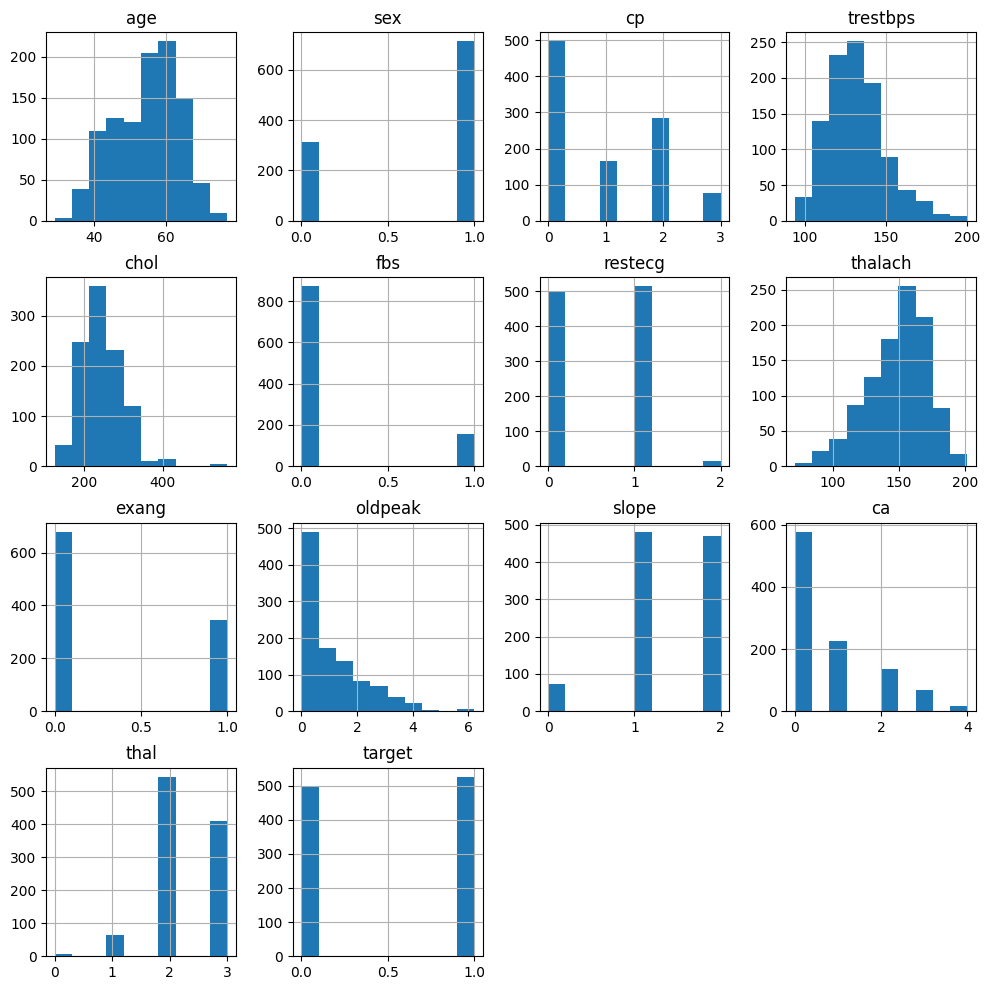

In [75]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

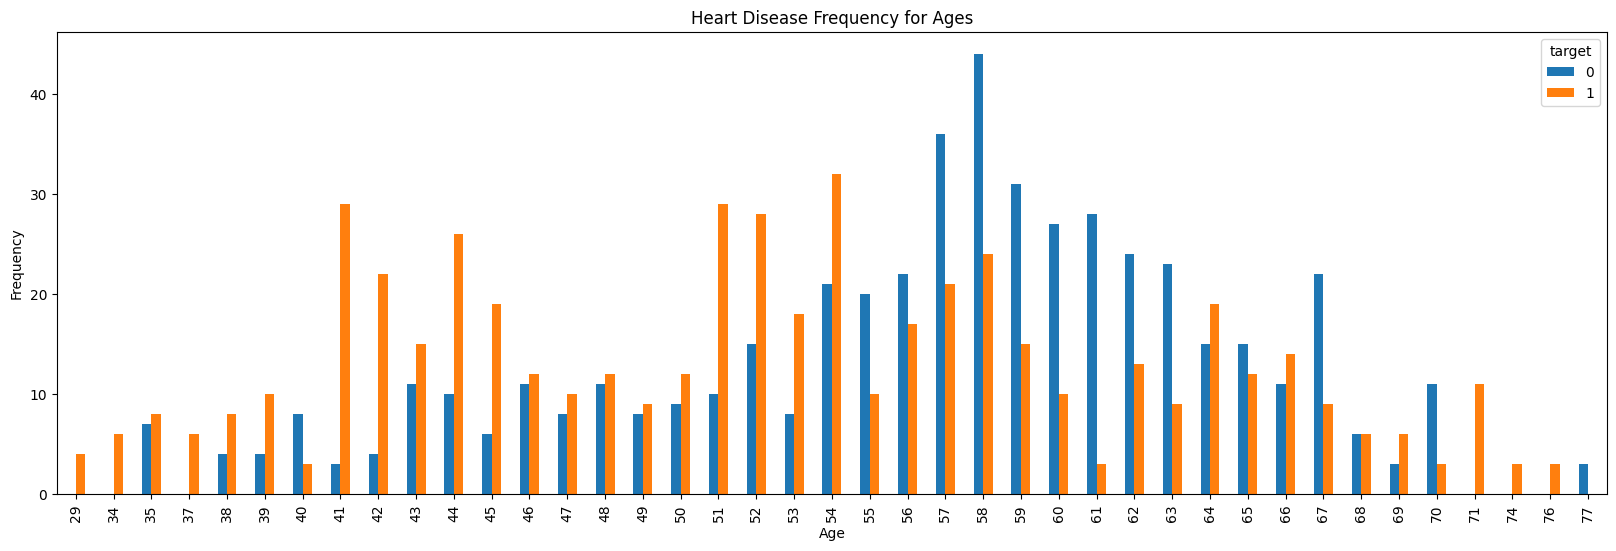

In [76]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

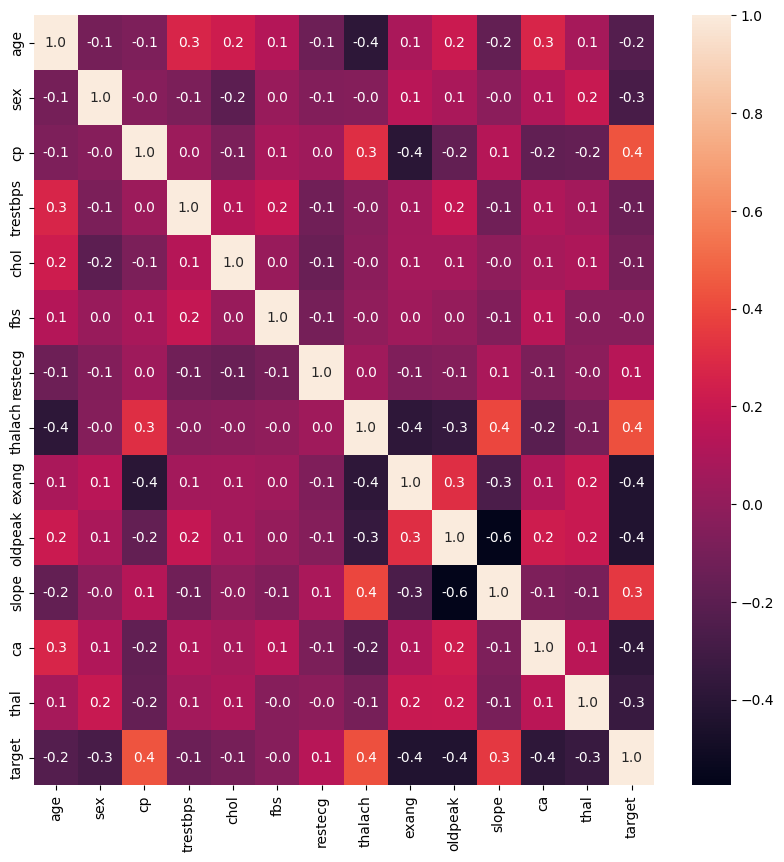

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

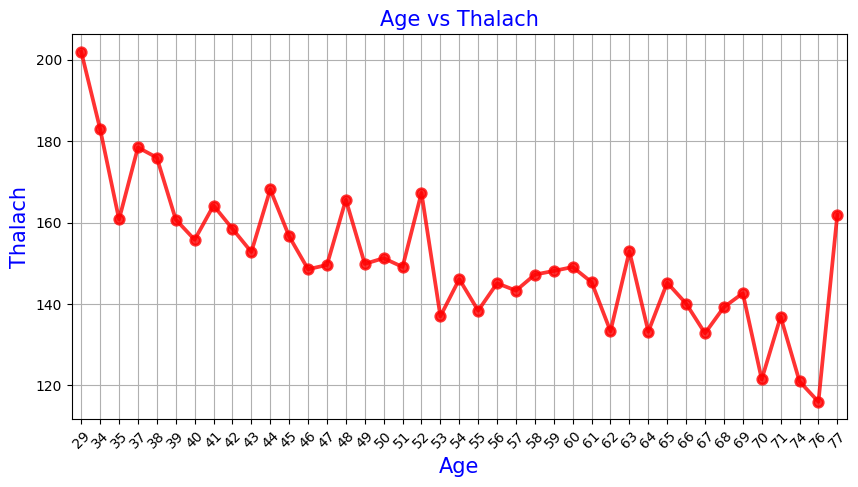

In [46]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

<a class="anchor" id="2."></a>
# 2.Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).


In [47]:
X = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

In [48]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [49]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [50]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

In [51]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [52]:
# convert the data to categorical labels
#from keras.utils.np_utils import to_categorical

#Y_train = to_categorical(y_train, num_classes=None)
#Y_test = to_categorical(y_test, num_classes=None)
#print (Y_train.shape)
#print (Y_train[:10])

In [53]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

<a class="anchor" id="3."></a>
# 3.Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
#def create_model():
    # create model
   # model = Sequential()
   # model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
   # model.add(Dropout(0.25))
   # model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
   # model.add(Dropout(0.25))
   # model.add(Dense(2, activation='softmax'))

    # compile model
   # adam = Adam(lr=0.001)
   # model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    #return model

#model = create_model()

#print(model.summary())

In [55]:
# fit the model to the training data
#history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

In [56]:
#import matplotlib.pyplot as plt
#%matplotlib inline
# Model accuracy
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('Model Accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'])
#plt.show()

In [57]:
# Model Losss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model Loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'])
#plt.show()

<a class="anchor" id="4."></a>
# 4.Improving Results - A Binary Classification Problem

Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [58]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


In [59]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    #adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6482 - loss: 0.6791 - val_accuracy: 0.8000 - val_loss: 0.5929
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7681 - loss: 0.5759 - val_accuracy: 0.8537 - val_loss: 0.4635
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8056 - loss: 0.4528 - val_accuracy: 0.8439 - val_loss: 0.3952
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8388 - loss: 0.4106 - val_accuracy: 0.8341 - val_loss: 0.3634
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8347 - loss: 0.4012 - val_accuracy: 0.8537 - val_loss: 0.3498
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8629 - loss: 0.3371 - val_accuracy: 0.8634 - val_loss: 0.3384
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8477 - loss: 0.3826 - val_accuracy: 0.8634 - val_loss: 0.3316
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8658 - loss: 0.3757 - val_accuracy: 0.8780 - va

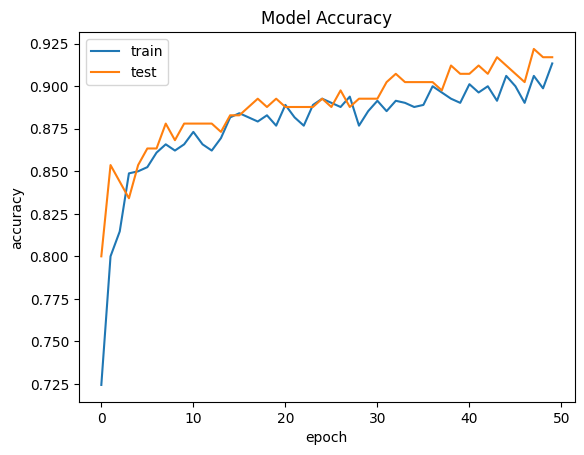

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

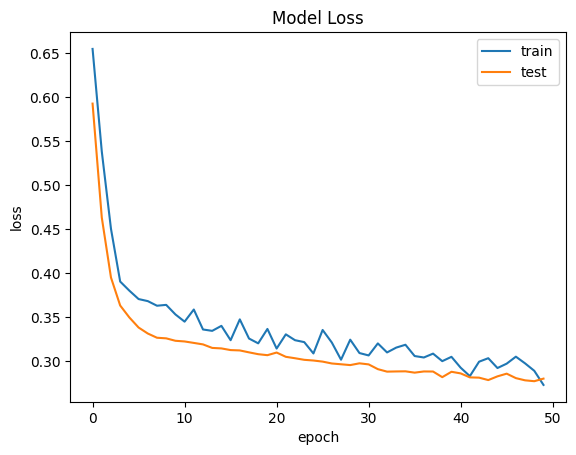

In [62]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="5."></a>
# 5.Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [63]:
# generate classification report using predictions for categorical model
#from sklearn.metrics import classification_report, accuracy_score

#categorical_pred = np.argmax(model.predict(X_test), axis=1)

#print('Results for Categorical Model')
#print(accuracy_score(y_test, categorical_pred))
#print(classification_report(y_test, categorical_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
--- Resultados da Avaliação (Checklist 4.3) ---

1. Acurácia:
0.9170731707317074

2. Relatório de Classificação (Precisão e Recall):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.92      0.92      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205


3. Matriz de Confusão (Dados Brutos):
[[91  9]
 [ 8 97]]

--- Visualização da Matriz de Confusão ---


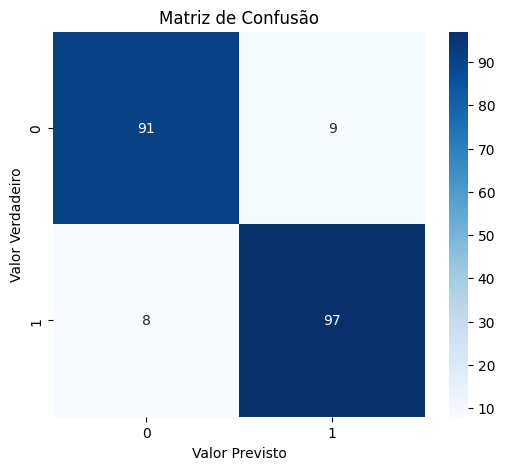

In [64]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

binary_pred_probs = binary_model.predict(X_test)
binary_pred = np.round(binary_pred_probs).astype(int)

print('--- Resultados da Avaliação (Checklist 4.3) ---')

print('\n1. Acurácia:')
print(accuracy_score(Y_test_binary, binary_pred))

print('\n2. Relatório de Classificação (Precisão e Recall):')
print(classification_report(Y_test_binary, binary_pred))

print('\n3. Matriz de Confusão (Dados Brutos):')
cm = confusion_matrix(Y_test_binary, binary_pred)
print(cm)

print('\n--- Visualização da Matriz de Confusão ---')
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()